# FINAL PROJECT 3: ENSEMBLE - RANDOM FOREST AND BOOSTING
# 1. Perkenalan

Our Members:
1. Safril Ahmadi Sanmas / PYTN-KS17-022
2. Maulana Ridhwan Riziq / PYTN-KS17-010
3. Nadyla Alfiena Candra / PYTN-KS17-012
4. Novi Sabaniatir Rohmah / PYTN-KS17-023

Sebuah data yang berisi tentang Heart Failure Prediction. Data ini menjelaskan Penyakit kardiovaskular (CVD) merupakan penyebab kematian nomor 1 secara global , merenggut sekitar 17,9 juta jiwa setiap tahunnya , atau menyumbang 31% dari seluruh kematian di seluruh dunia . Gagal jantung merupakan kejadian umum yang disebabkan oleh penyakit kardiovaskular dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.
Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor-faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi populasi yang luas.
Orang dengan penyakit kardiovaskular atau yang memiliki risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia, atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini sehingga model pembelajaran mesin dapat sangat membantu .

Dataset ini memiliki 13 atribut. Prediksi keselamatan pasien dari penyakit jantung. Berikut merupakan attribute information: 
* age - umur pasien
* anaemia - apakah ada pengurangan haemoglobin 
* creatinine_phosphokinase - level enzim CPK dalam mcg/L 
* diabetes - apakah pasien punya riwayat diabetes 
* ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung 
* high_blood_pressure - apakah pasien punya darah tinggi 
* platelets - jumlah platelet di darah dalam kiloplatelets/mL 
* serum_creatinine - level serum creatinine di darah dalam mg/dL 
* serum_sodium - level serum sodium di darah dalam mEq/L 
* sex - apakah pasien pria atau wanita 
* smoking - apakah pasien merokok 
* time - waktu dalam hari untuk follow-up 
* DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

Objektif 
Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:
* Mampu memahami konsep Classification dengan Ensemble Model 
* Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
* Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# 2. Import Pustaka

Pada bagian ini adalah mengimport pustaka yang akan digunakan untuk analisis data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 3. Data Loading

Memasukkan dataframe, kali ini menggunakan dataframe Heart Failure Prediction.

In [2]:
df = pd.read_csv("D:\Python for Data Science\Data\heart_failure_clinical_records_dataset.csv") 
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# menyalin dataframe
dc = df.copy()

In [4]:
# Menampilkan semua kolom dataframe
pd.set_option('display.max_columns', 500)

Selanjutnya kita melihat ukuran dari data tersebut.

In [5]:
# Melihat dimensi dataframe
dc.shape

(299, 13)

Dari hasil di atas, diketahui bahwa dataframe tersebut memiliki 299 baris dan 13 kolom.

Selanjutnya, kita melihat tipe data dari kolom-kolom data tersebut.

In [6]:
dc.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
# Melihat informasi data
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Dari hasil tersebut, diketahui bahwa data tersebut memiliki sebanyak 3 tipe data float64 dan 10 data int64.

Selanjutnya, kita melihat Unique dari data tersebut.

In [8]:
for col in dc.columns:
    print("UNIQUE VALUES FOR ",col)
    print("="*40)
    print(dc[col].unique())

UNIQUE VALUES FOR  age
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
UNIQUE VALUES FOR  anaemia
[0 1]
UNIQUE VALUES FOR  creatinine_phosphokinase
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 161

Dari hasil tersebut, diketahui bahwa terdapat beberapa 6 tipe data kategorikal (variabel biner) dan 7 tipe data numerik (variabel continue).

Selanjutya, kita melihat 5 data teratas dan 5 data terbawah.

In [9]:
dc.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
# Melihat 5 data teratas
dc.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
# Melihat 5 data terbawah
dc.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


Selanjutnya adalah statistik deskriptif dari data tersebut.

In [12]:
# Melihat Statistik Dataframe secara umum
dc.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Dari hasi tersebut, diketahui:

* Usia:

Rata-rata usia individu dalam dataset adalah sekitar 60,83 tahun, dengan usia minimum 40 dan usia maksimum 95.

* Creatinine Phosphokinase, Ejection Fraction, Platelets, Serum Creatinine, Serum Sodium:

Creatinine Phosphokinase memiliki rata-rata sekitar 581,84, dengan minimum 23 dan maksimum 7861.
Ejection Fraction memiliki rata-rata sekitar 38,08, dengan minimum 14 dan maksimum 80.
Platelets memiliki rata-rata sekitar 263.358,03, dengan minimum 25.100 dan maksimum 850.000.
Serum Creatinine memiliki rata-rata sekitar 1,39, dengan minimum 0,5 dan maksimum 9,4.
Serum Sodium memiliki rata-rata sekitar 136,63, dengan minimum 113 dan maksimum 148.

* Waktu:

memiliki Rata-rata sekitar 130,26, dengan minimum 4 dan maksimum 285.


# 4. Data Cleaning

Pada tahap ini, kita akan mengecek apakah terdapat data yang duplikat atau tidak.

In [13]:
# Mengecek duplikat pada data
dc.duplicated().sum()

0

Dari hasil di atas, tidak terdapat data yang duplikat.

Selanjutnya mengecek missing value pada data.

In [14]:
# Mengecek missing value pada data
dc.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dari hasil tersebut, terlihat bahwa tidak terdapat data yang missing.

Selanjutnya, kita melihat data yang oulier untuk variabel conitune.

In [15]:
continue_columns = dc[['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']]

In [16]:
num_cols = dc.select_dtypes(include=['float64', 'int64']).columns
print(num_cols)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


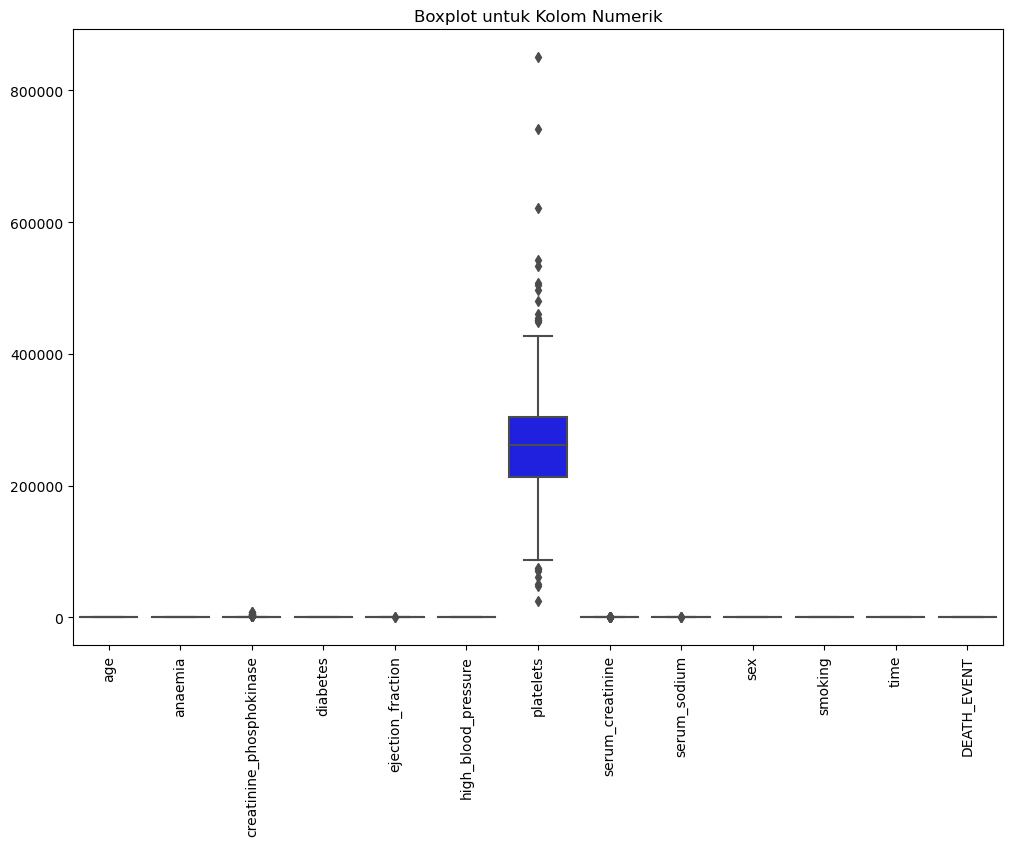

In [17]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(dc[num_cols], showfliers=True, color='blue')  # Menghilangkan pencilan untuk melihat lebih jelas
plt.title('Boxplot untuk Kolom Numerik')
plt.xticks(rotation='vertical')  # Memutar label sumbu x
plt.show()

Dari hasil plot di atas, pada beberapa kolom terdapat nilai yang outliers yaitu 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium'. Dikarenakan masih terdapat data yang outliers maka perlu dihilangkan nilai outliers. untuk menghilangkan outliers kita menggunakan metode IQR Outlier Removal.

In [18]:
# Menghilangkan nilai outliers
data_outliers = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']
for data in data_outliers:
    q1 = dc[data].quantile(0.25)
    q3 = dc[data].quantile(0.75)
    IQR = q3-q1
    limit_bawah = q1 - (IQR * 1.5)
    limit_atas = q3 + (IQR * 1.5)
    dc.loc[dc[data] < limit_bawah, data] = limit_bawah
    dc.loc[dc[data] > limit_atas, data] = limit_atas

Selanjutnya kita membuat boxplot lagi untuk melihat apakah masih terdapat nilai yang outliers.

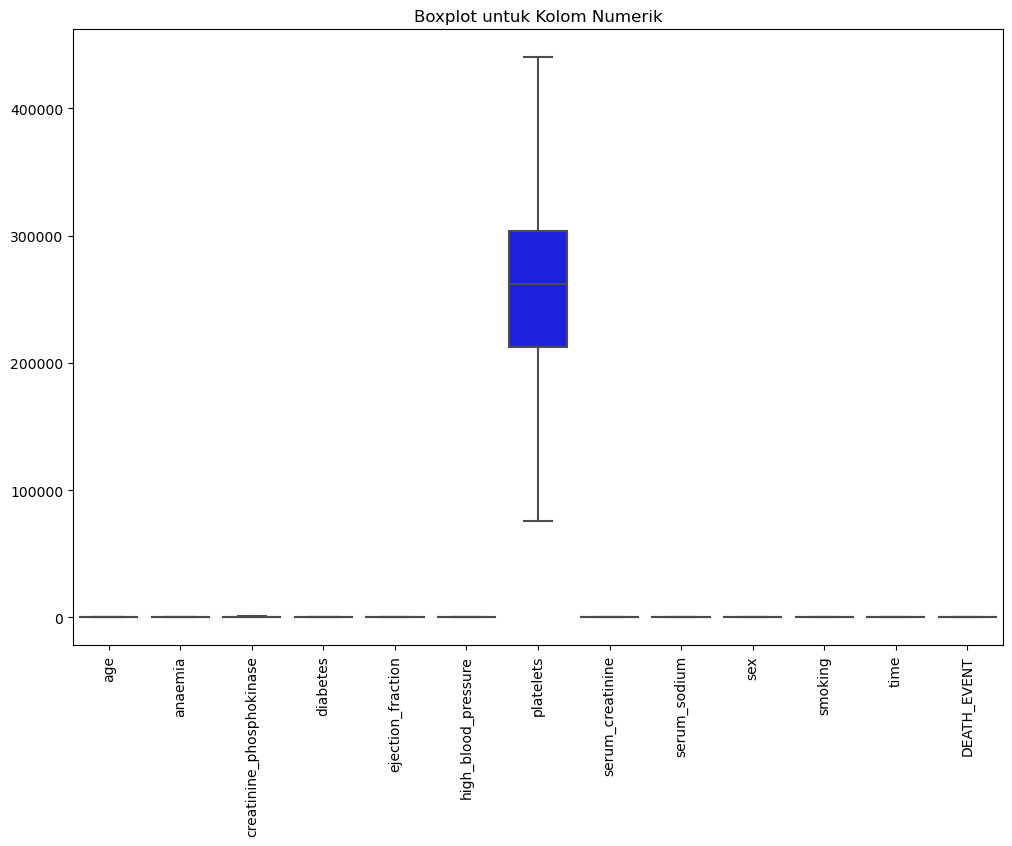

In [19]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(dc[num_cols], showfliers=True, color='blue')  # Menghilangkan pencilan untuk melihat lebih jelas
plt.title('Boxplot untuk Kolom Numerik')
plt.xticks(rotation='vertical')  # Memutar label sumbu x
plt.show()

Dari hasil plot di atas, terlihat tidak terdapat lagi variabel yang memiliki nilai outliers.

# 5. Exploratory Data Analysis,

Untuk eksplorasi pertama kita ingin melihat distribusi dari kolom-kolom kategori pada data tersebut.

In [57]:
# Daftar atribut kategori
kategori_columns = dc[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]

# Hitung dan tampilkan distribusi kategori
for column in kategori_columns:
    distribution = dc[column].value_counts(normalize=True) * 100  # Menghitung proporsi dalam persen
    print(f'Distribusi {column}:')
    print(distribution)
    print('\n')

Distribusi anaemia:
0    56.856187
1    43.143813
Name: anaemia, dtype: float64


Distribusi diabetes:
0    58.19398
1    41.80602
Name: diabetes, dtype: float64


Distribusi high_blood_pressure:
0    64.882943
1    35.117057
Name: high_blood_pressure, dtype: float64


Distribusi sex:
1    64.882943
0    35.117057
Name: sex, dtype: float64


Distribusi smoking:
0    67.892977
1    32.107023
Name: smoking, dtype: float64


Distribusi DEATH_EVENT:
0    67.892977
1    32.107023
Name: DEATH_EVENT, dtype: float64




Selanjutnya adalah plot dari distribusi tersebut.

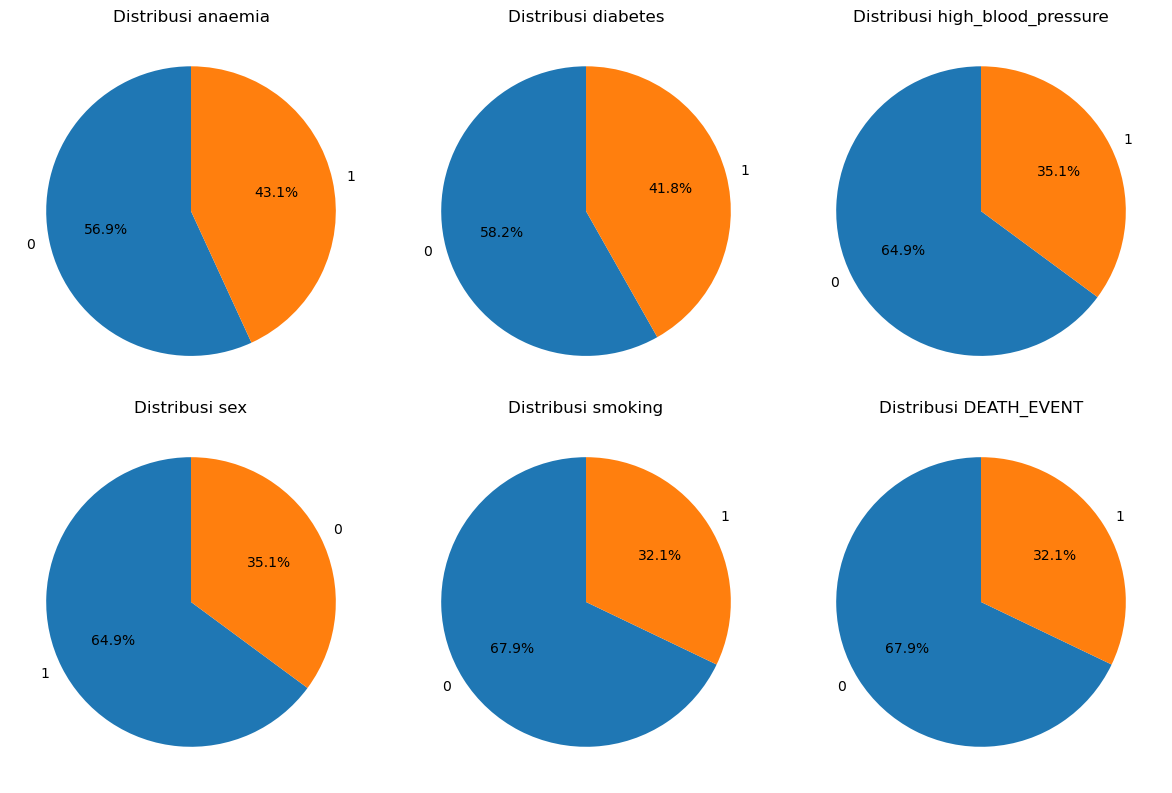

In [58]:
# Daftar atribut kategori
kategori_columns = dc[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]

# Mengatur ukuran gambar
plt.figure(figsize=(12, 8))

# Iterasi melalui kolom kategori
for i, column in enumerate(kategori_columns):
    # Menghitung distribusi kategori
    distribution = dc[column].value_counts(normalize=True) * 100  # Menghitung proporsi dalam persen

    # Membuat pie chart
    plt.subplot(2, 3, i+1)  # 2 baris, 3 kolom
    plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribusi {column}')

# Menampilkan pie chart
plt.tight_layout()
plt.show()

Dari hasil di atas, diketahui pada observasi tersebut untuk 
1. Anaemia:
Sekitar 56.86% dari sampel tidak menderita anemia, sementara 43.14% menderita anemia.

2. Diabetes:
Sekitar 58.19% dari sampel tidak memiliki diabetes, sementara 41.81% memiliki diabetes.

3. High Blood Pressure:
Interpretasi: Sekitar 64.88% dari sampel tidak memiliki tekanan darah tinggi, sementara 35.12% memiliki tekanan darah tinggi.

4. Sex:
Sekitar 64.88% dari sampel adalah laki-laki, sementara 35.12% adalah perempuan.

5. Smoking:
Sekitar 67.89% dari sampel tidak merokok, sementara 32.11% merokok.

6. DEATH_EVENT
Sekitar 67.9% dari sampel tidak terjadi kematian, sementara 32.1% terjadi kematian.

Selanjutnya kita akan melihat korelasi antar variabel-variabel dengan variabel 'DEATH_EVENT'.

In [22]:
dc.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.086870,-0.101012,0.066056,0.093289,-0.034159,0.253989,-0.052425,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.214201,-0.012729,0.034259,0.038182,-0.029060,-0.016329,0.048286,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.086870,-0.214201,1.000000,0.011575,-0.044189,-0.077600,-0.012715,-0.077821,0.020806,0.043623,-0.033310,0.114641,-0.006355
diabetes,-0.101012,-0.012729,0.011575,1.000000,-0.001267,-0.012732,0.070419,-0.009790,-0.071714,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.066056,0.034259,-0.044189,-0.001267,1.000000,0.026419,0.068474,-0.168809,0.181716,-0.144435,-0.065217,0.044765,-0.270611
high_blood_pressure,0.093289,0.038182,-0.077600,-0.012732,0.026419,1.000000,0.073361,-0.072465,0.026167,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.034159,-0.029060,-0.012715,0.070419,0.068474,0.073361,1.000000,-0.052139,0.054313,-0.124212,0.012990,-0.003807,-0.044132
serum_creatinine,0.253989,-0.016329,-0.077821,-0.009790,-0.168809,-0.072465,-0.052139,1.000000,-0.293201,0.034192,-0.043262,-0.176060,0.388469
serum_sodium,-0.052425,0.048286,0.020806,-0.071714,0.181716,0.026167,0.054313,-0.293201,1.000000,-0.038217,0.011637,0.085066,-0.201320
sex,0.065430,-0.094769,0.043623,-0.157730,-0.144435,-0.104615,-0.124212,0.034192,-0.038217,1.000000,0.445892,-0.015608,-0.004316


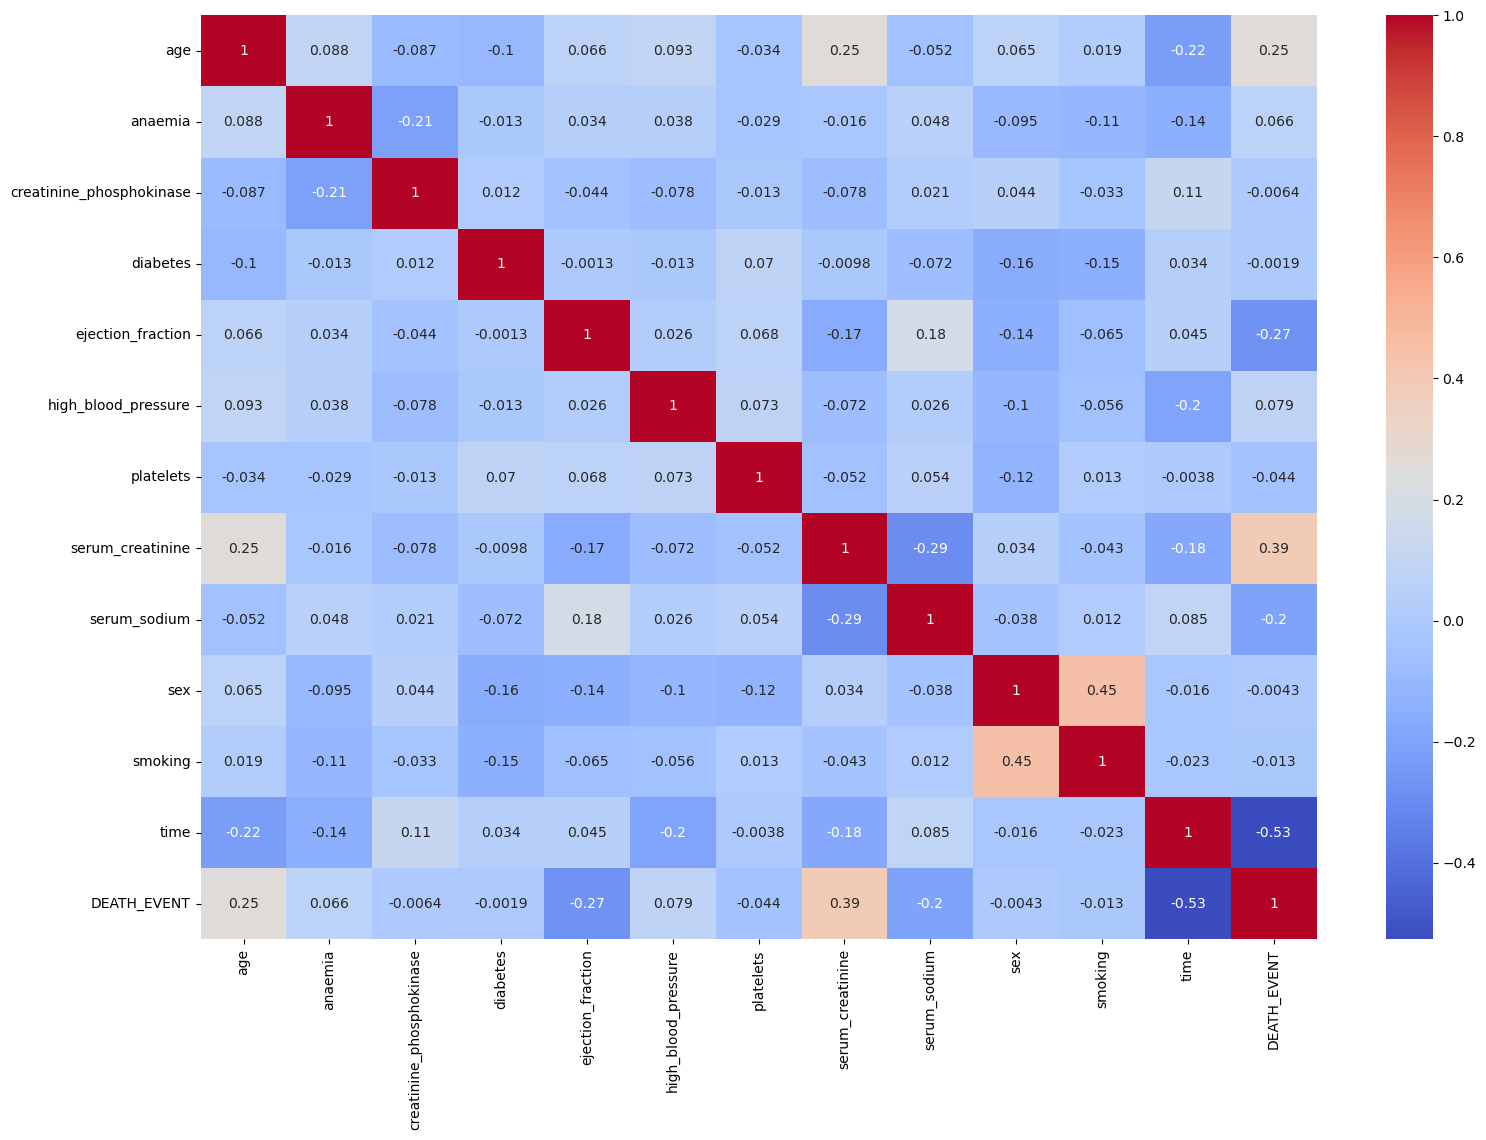

In [23]:
# Heatmap
plt.figure(figsize=(18,12))
sns.heatmap(dc.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=90)
plt.show()

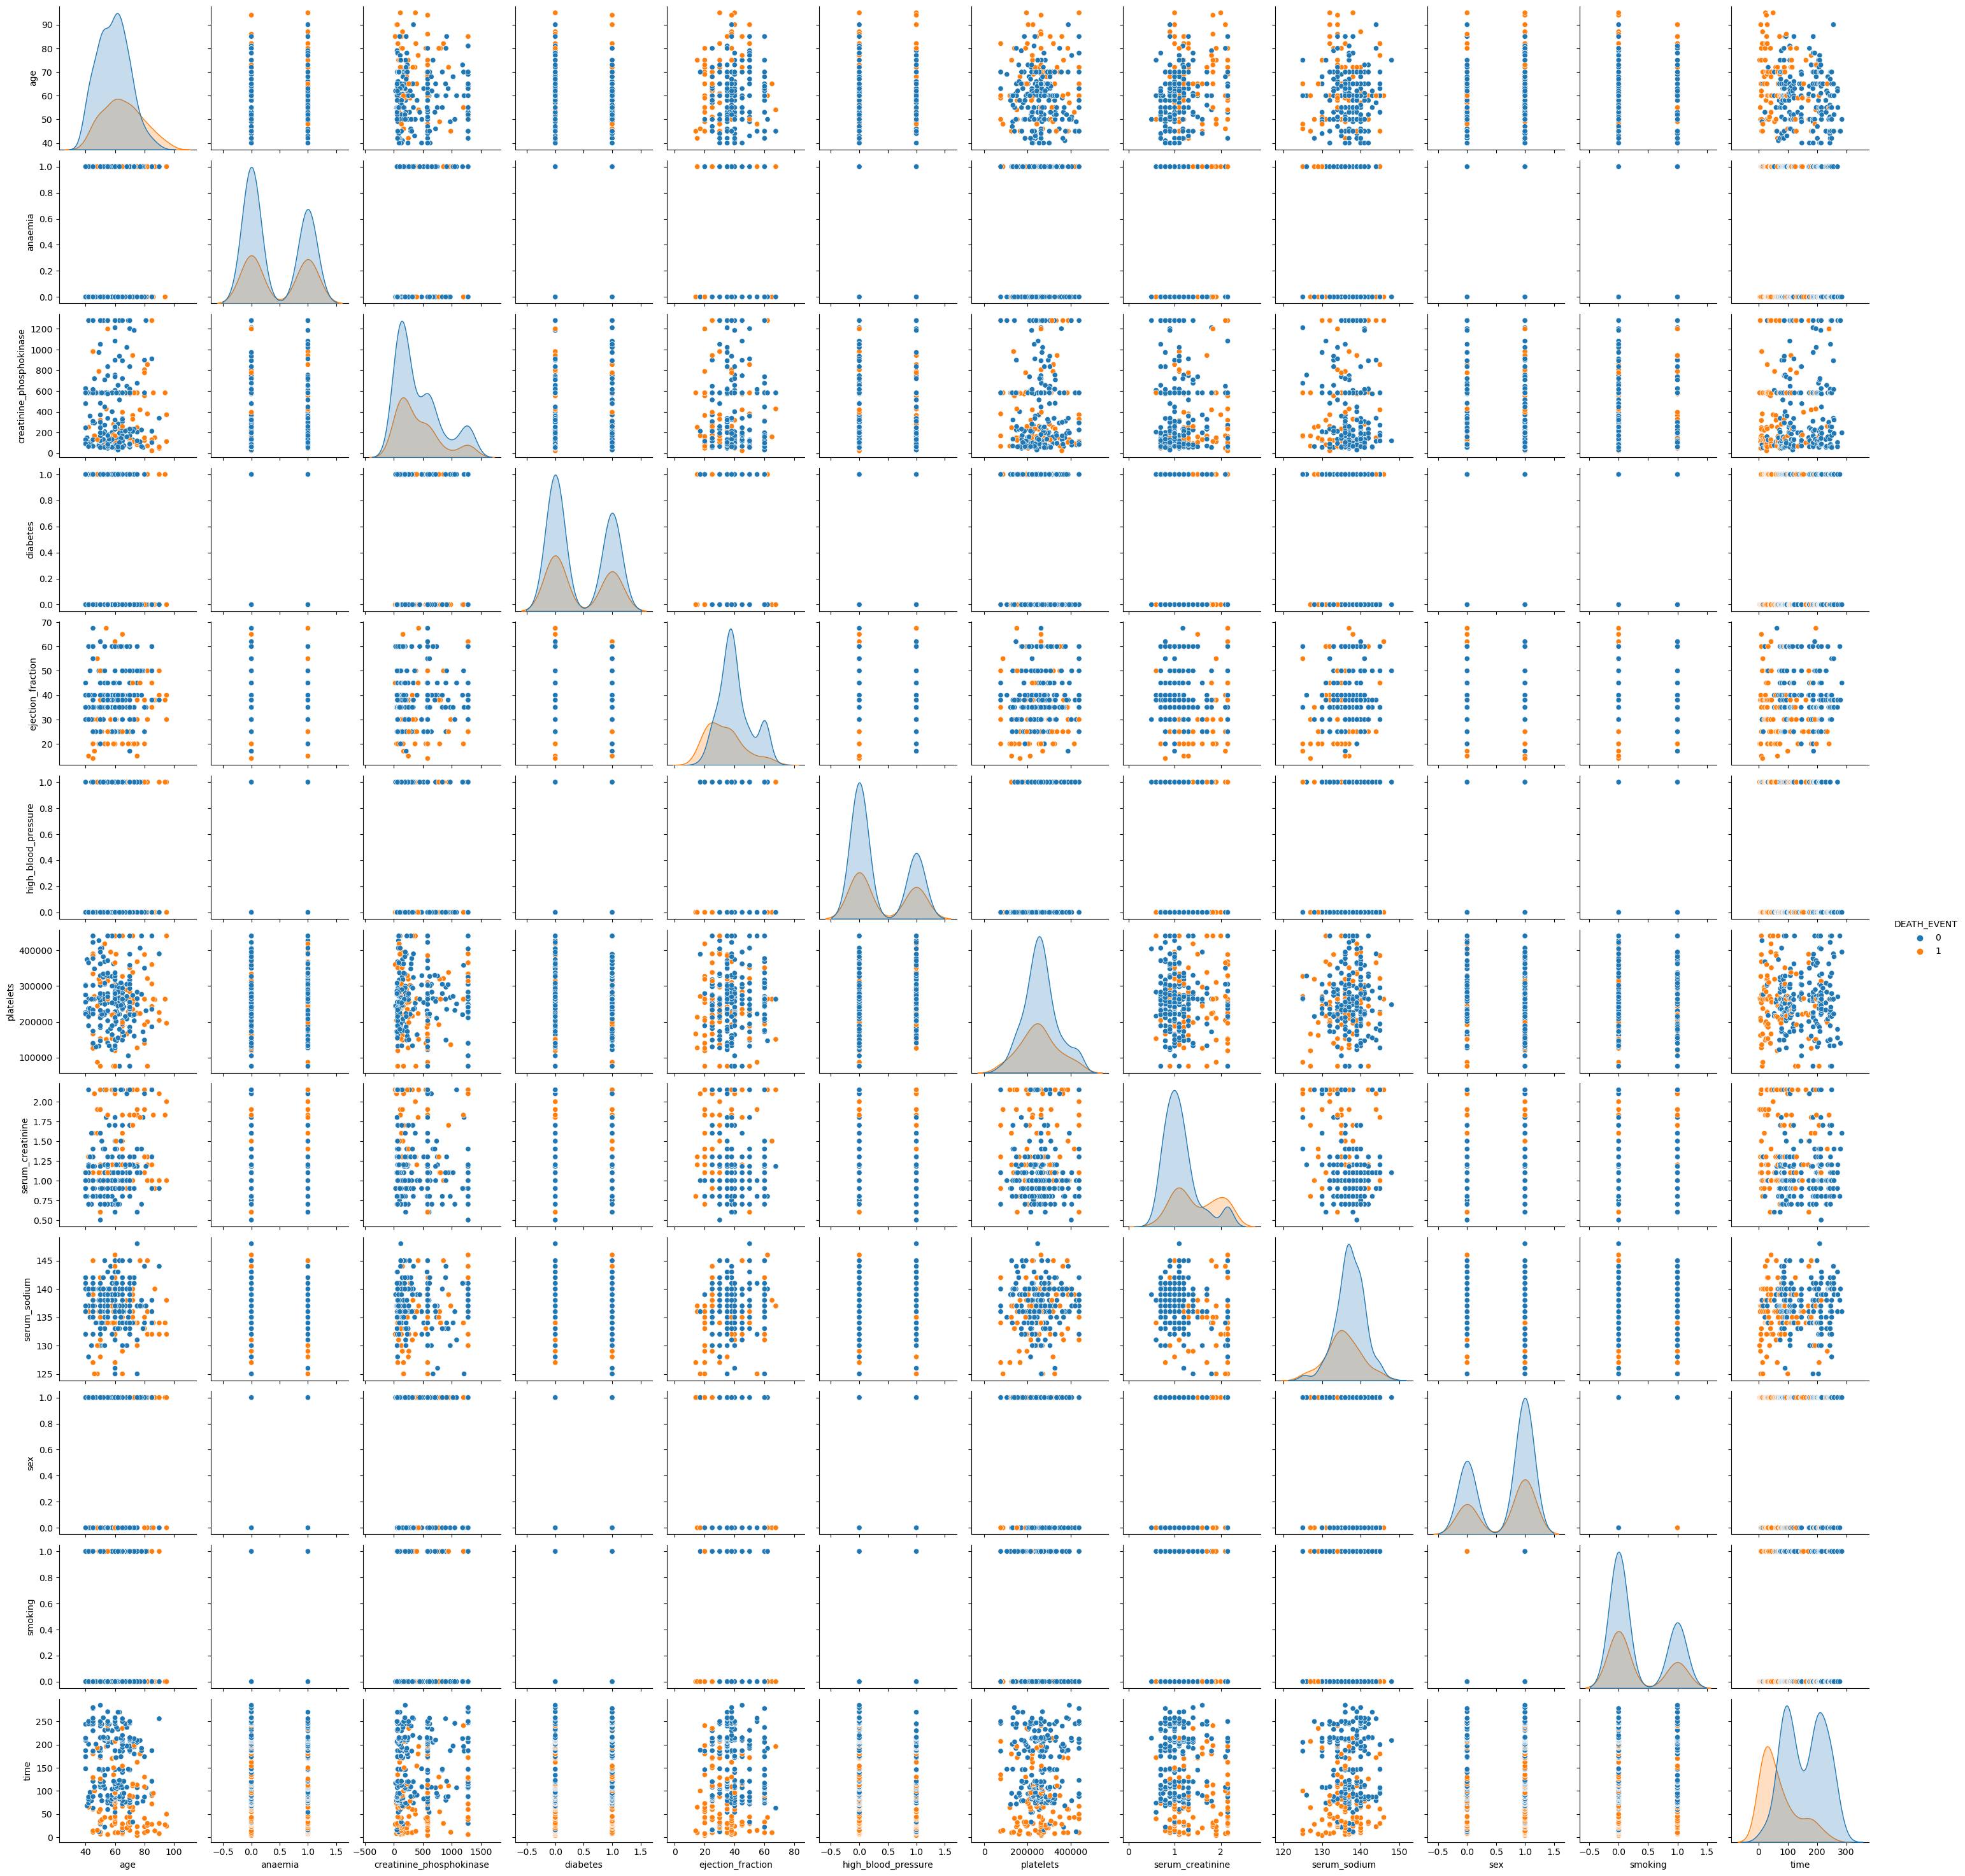

In [24]:
# Pairplot for selected columns
sns.pairplot(dc, hue='DEATH_EVENT')
plt.show()

Dari hasil di atas, diketahui bahwa:

* Korelasi yang tinggi antara variabel age dan time dengan DEATH_EVENT. Nilai positif menunjukkan bahwa semakin tinggi usia atau waktu follow-up, semakin tinggi korelasi positif dengan kejadian kematian (DEATH_EVENT).

* Korelasi negatif yang signifikan antara ejection_fraction dengan DEATH_EVENT. Semakin tinggi nilai ejection_fraction, semakin rendah kemungkinan terjadinya kejadian kematian (DEATH_EVENT).

* Korelasi negatif yang cukup kuat antara time dengan DEATH_EVENT. Ini bisa diartikan bahwa semakin lama waktu follow-up, semakin rendah kemungkinan terjadinya kejadian kematian.

* Korelasi yang cukup tinggi antara variabel serum_creatinine dan DEATH_EVENT, menunjukkan bahwa tingginya konsentrasi serum creatinine berkorelasi positif dengan kejadian kematian.

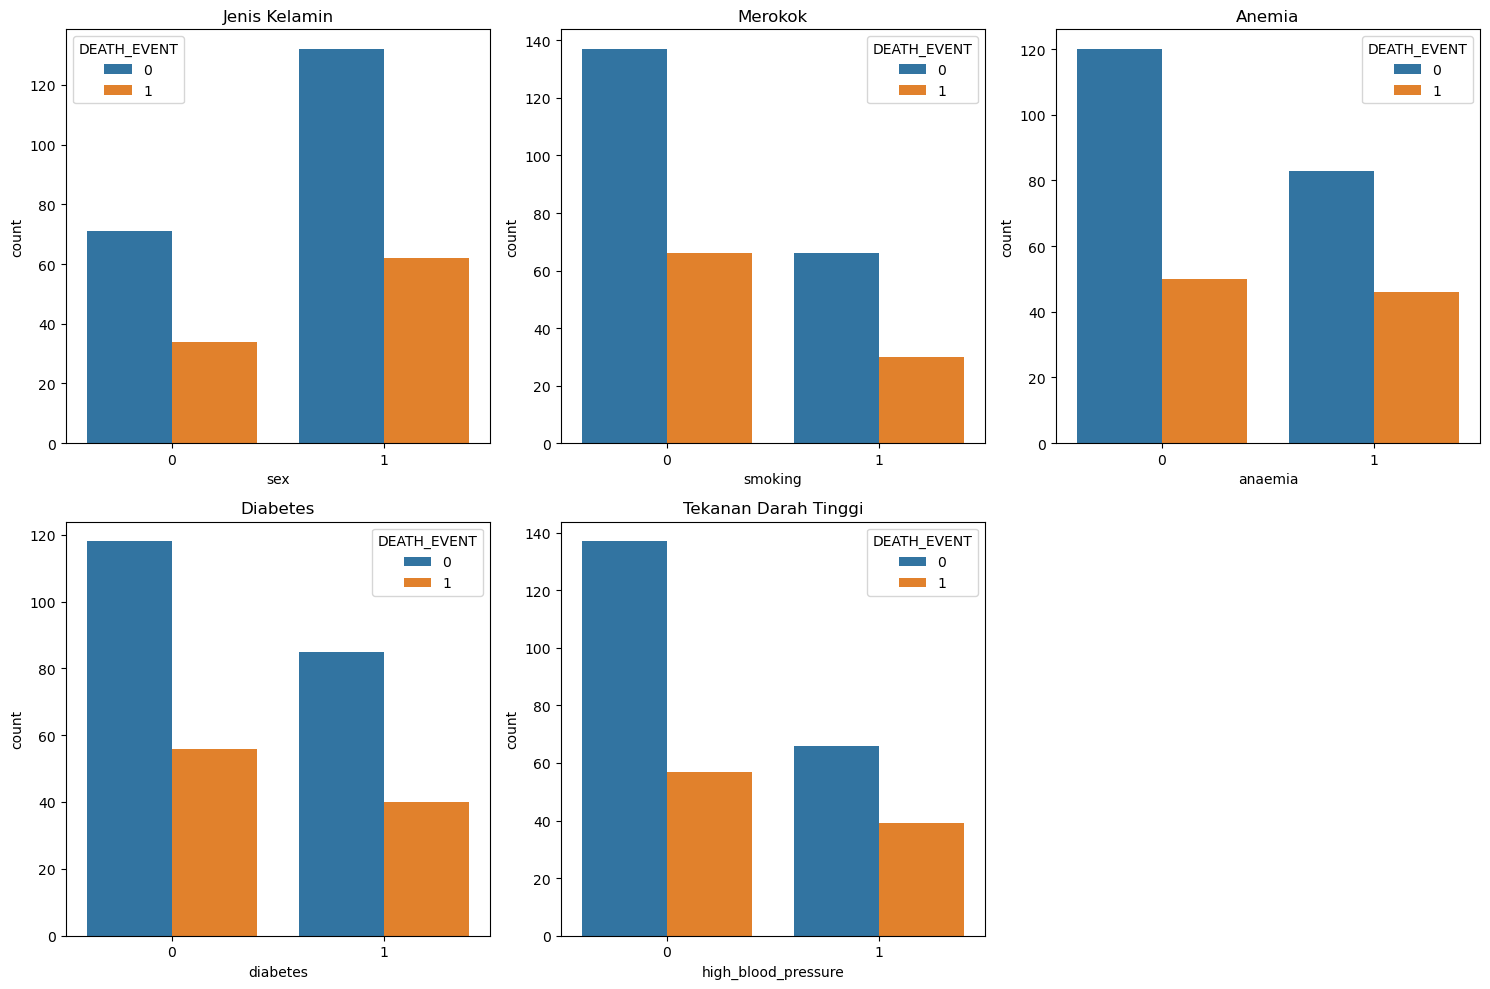

In [25]:
# Setting ukuran gambar
plt.figure(figsize=(15, 10))

# Plot untuk Jenis Kelamin (`sex`)
plt.subplot(2, 3, 1)
sns.countplot(x='sex', hue='DEATH_EVENT', data=df)
plt.title('Jenis Kelamin')

# Plot untuk Merokok (`smoking`)
plt.subplot(2, 3, 2)
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)
plt.title('Merokok')

# Plot untuk Anemia (`anaemia`)
plt.subplot(2, 3, 3)
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df)
plt.title('Anemia')

# Plot untuk Diabetes (`diabetes`)
plt.subplot(2, 3, 4)
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=df)
plt.title('Diabetes')

# Plot untuk Tekanan Darah Tinggi (`high_blood_pressure`)
plt.subplot(2, 3, 5)
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)
plt.title('Tekanan Darah Tinggi')

# Menyusun subplot dan menampilkan gambar
plt.tight_layout()
plt.show()

Dari hasil di atas, dapat diketahui 

1. Grafik untuk Jenis Kelamin (sex):
Grafik pertama menunjukkan distribusi kematian berdasarkan jenis kelamin. Dari hasil tersebut dapat dilihat bahwa banyaknya perempuan yang tidak terjadi mati adalah sekitar 70 orang dan yang terjadi mati sekitar 30 orang. sedangkan banyaknya pria yang tidak terjadi mati sekitar 130 orang dan tidak terjadi mati sekitar 60 orang.

2. Grafik untuk Merokok (smoking):
Kita dapat melihat seberapa banyak kematian terjadi di antara perokok dan bukan perokok. Dari hasil tersebut dapat dilihat bahwa banyaknya tidak perokok yang tidak terjadi mati adalah sekitar 135 orang dan yang terjadi mati sekitar 60 orang. sedangkan banyaknya perokok yang tidak terjadi mati sekitar 60 orang dan tidak terjadi mati sekitar 30 orang.

3. Grafik untuk Anemia (anaemia):
Grafik ketiga menunjukkan distribusi kematian berdasarkan apakah seseorang menderita anemia atau tidak. Dari hasil tersebut dapat dilihat bahwa banyaknya tidak anemia yang tidak terjadi mati adalah sekitar 120 orang dan yang terjadi mati sekitar 50 orang. sedangkan banyaknya anemia yang tidak terjadi mati sekitar 80 orang dan tidak terjadi mati sekitar 40 orang.

4. Grafik untuk Diabetes (diabetes):
Grafik keempat menunjukkan distribusi kematian berdasarkan apakah seseorang menderita diabetes atau tidak. Dari hasil tersebut dapat dilihat bahwa banyaknya tidak diabete yang tidak terjadi mati adalah sekitar 120 orang dan yang terjadi mati sekitar 50 orang. sedangkan banyaknya perokok yang tidak terjadi mati sekitar 80 orang dan tidak terjadi mati sekitar 40 orang.

5. Grafik untuk Tekanan Darah Tinggi (high_blood_pressure):
Grafik kelima menunjukkan distribusi kematian berdasarkan apakah seseorang memiliki tekanan darah tinggi atau tidak. Dari hasil tersebut dapat dilihat bahwa banyaknya Tekanan Darah Tidak Tinggi yang tidak terjadi mati adalah sekitar 135 orang dan yang terjadi mati sekitar 50 orang. sedangkan banyaknya Tekanan Darah Tinggi yang tidak terjadi mati sekitar 60 orang dan tidak terjadi mati sekitar 30 orang.

# 6. Defining Model

In [26]:
dc1 = dc.copy()

Sebelum memulai splitting data, kita mendefenisikan data tersebut terlebih dahulu dengan variabel y adalah 'DEATH_EVENT' dan X selain 'DEATH_EVENT'.

In [27]:
# Defenisiskan data
X= dc1.drop('DEATH_EVENT', axis=1)
y= dc1['DEATH_EVENT']

Setelah melakukan defenisi data, langkah selanjutnya adalah splitting data dengan menggunakan ukuran pengujian 30% dari data akan menjadi data pengujian dan random state 61.

In [28]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=61)

Selanjutnya adalah scaling data untuk mengubah rentang nilai dari fitur-fitur pada dataset sehingga fitur-fitur tersebut memiliki skala yang seragam.

In [29]:
# Melakukan proses scaling pada variabel prediktor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# Cetak jumlah data pada masing-masing set
print('Shape of X:', X.shape)
print('Shape of Y:', y.shape)
print("Shape of X Train: ", X_train_scaled.shape)
print("Shape of Y Train: ", y_train.shape)
print("Shape of X Test: ", X_test_scaled.shape)
print("Shape of Y Test: ", y_test.shape)

Shape of X: (299, 12)
Shape of Y: (299,)
Shape of X Train:  (209, 12)
Shape of Y Train:  (209,)
Shape of X Test:  (90, 12)
Shape of Y Test:  (90,)


Dari hasil di atas, diketahui bahwa jumlah sampel yang digunakan untuk train data sebanyak 209 dan test data sebanyak 90.

# 7. Random Forest Classifier

In [31]:
# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [33]:
# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4, 5, 6]
}

In [34]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

In [35]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 50, 100],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [36]:
# Get the best parameters
best_params = grid_search.best_params_

In [37]:
# Get the best model
best_model = grid_search.best_estimator_

In [38]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

In [39]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')

Best Parameters: {'max_depth': 50, 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8


Hasil tersebut menyajikan parameter terbaik untuk model, yaitu 'max_depth' sebesar 50, 'min_samples_leaf' sebesar 6, 'min_samples_split' sebesar 10, dan 'n_estimators' sebesar 100. Dengan Akurasi model yang menggunakan parameter ini mencapai 80%, menunjukkan seberapa baik model tersebut dalam membuat prediksi yang benar.

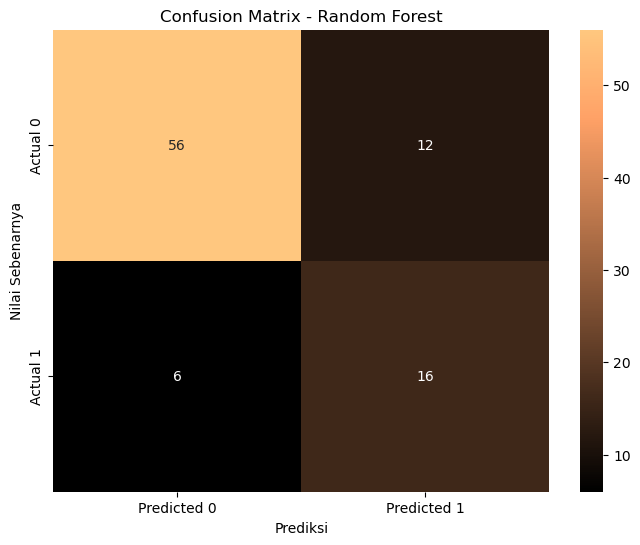

In [40]:
# Membuat confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='copper')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show() 

Dapat dilihat bahwa confusssion matrix tersebut terdapat jumlah sampel positif yang telah benar-benar diprediksi dengan benar oleh model sebanyak 56. Jumlah sampel negatif yang telah benar-benar diprediksi dengan benar oleh model sebanyak 16. Jumlah sampel negatif yang sebenarnya (Kesalahan Tipe 1) tetapi salah diprediksi sebagai positif oleh model sebanyak 12. Jumlah sampel positif yang sebenarnya (Kesalahan Tipe 2) tetapi salah diprediksi sebagai negatif oleh model sebanyak 6.

# 8. Gradient Boosting

In [41]:
# Membuat model Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=33)

In [42]:
# Melatih model pada data latih
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=33)

In [43]:
# Membuat prediksi pada data uji
y_pred_boos = gb_classifier.predict(X_test)

In [44]:
# Mengukur akurasi model pada data uji
accuracy = accuracy_score(y_test, y_pred_boos)
print(f"Akurasi model: {accuracy}")

Akurasi model: 0.8111111111111111


Dari hasil tersebut didapatkan nilai akurasi model menggunakan teknik Bossting sebesar 81%

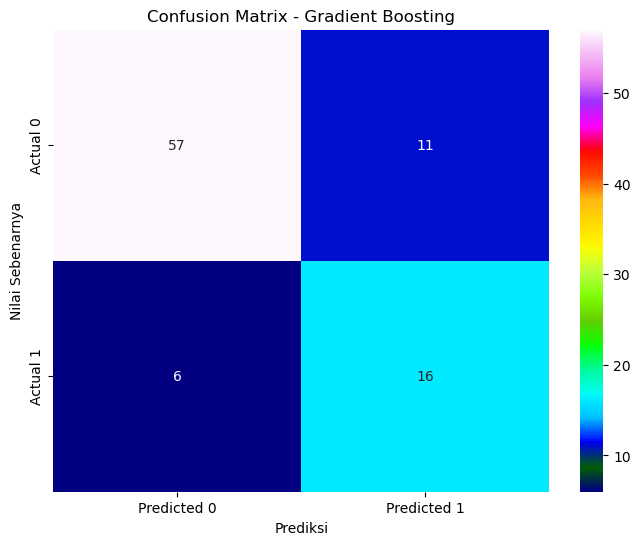

In [45]:
# Membuat confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_boos)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='gist_ncar')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Prediksi')
plt.ylabel('Nilai Sebenarnya')
plt.xticks([0.5, 1.5], ['Predicted 0', 'Predicted 1'])
plt.yticks([0.5, 1.5], ['Actual 0', 'Actual 1'])
plt.show()

Dapat dilihat bahwa confusssion matrix tersebut terdapat jumlah sampel positif yang telah benar-benar diprediksi dengan benar oleh model sebanyak 57. Jumlah sampel negatif yang telah benar-benar diprediksi dengan benar oleh model sebanyak 16. Jumlah sampel negatif yang sebenarnya (Kesalahan Tipe 1) tetapi salah diprediksi sebagai positif oleh model sebanyak 11. Jumlah sampel positif yang sebenarnya (Kesalahan Tipe 2) tetapi salah diprediksi sebagai negatif oleh model sebanyak 6.

# 9. Kesimpulan

Dari hasil di atas, dapat disimpulkan :
* Pada observasi tersebut, diketahui distrbusi variabel DEATH_EVENT akibat penyakit jantung sekitar 67.9% dari sampel tidak terjadi kematian, sementara 32.1% terjadi kematian.
* Dari 12 variabel Korelasi yang cukup tinggi terjadi antara variabel serum_creatinine dan DEATH_EVENT, menunjukkan bahwa tingginya konsentrasi serum creatinine berkorelasi positif dengan kejadian kematian. Sedangkan korelasi paling rendah terjadi antara variabel sex dan DEATH_EVENT, menunjukan bahwa sex tidak mempengaruhi terjadinya kematian.
* Gradient Boosting menunjukkan kinerja terbaik dengan akurasi 81% dibandingkan dengan Random Forest Classifier dengan akurasi 80%.